In [1]:
import datasets

/home1/nityakas/.conda/envs/lmeh/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!pip list

In [ ]:
!ls paraphrases_mrpc/

In [ ]:
!gunzip paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl.gz

In [ ]:
ds = datasets.load_dataset('allegrolab/paraphrases_mrpc')

In [ ]:
ds = datasets.load_dataset('json', data_files = 'paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl')
ds

In [ ]:
ds['train'][0]

In [ ]:
ds['train'][0]['meta']

In [2]:
import pandas as pd

In [ ]:
df = ds.to_pandas()

In [ ]:
dset = datasets.load_dataset("nyu-mll/glue", "cola")

In [ ]:
dset['train'][-1]

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("model_outputs/model_outputs_1b_100b_toks.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["duplicates"], df["loss"], color="blue", alpha=0.5)
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.title("Duplicates vs. Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x="duplicates", y="loss", jitter=0.25, alpha=0.5, size=3)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Forcing duplicates to be ordered categorically to get better horizontal jittering 
bins = [0, 1, 4, 16, 64, 256]
df["dup_bin"] = pd.Categorical(df["duplicates"], categories=bins, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x="dup_bin",
    y="loss",
    jitter=0.3,          # increase jitter for better spread
    alpha=0.4,           # transparency- helps make density clearer
    size=2.5,            # smaller points
    color="steelblue"    # custom dot color
)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
# plt.savefig("dups_vs_loss_strip_binned.png")
plt.show()

In [ ]:
# Forcing duplicates to be ordered categorically to get better horizontal jittering 
bins = [0, 1, 4, 16, 64, 256]

df = pd.read_csv("model_outputs_1b_100b_toks_std.csv")
df["dup_bin"] = pd.Categorical(df["duplicates"], categories=bins, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x="dup_bin",
    y="loss",
    jitter=0.3,          # increase jitter for better spread
    alpha=0.4,           # transparency- helps make density clearer
    size=2.5,            # smaller points
    color="steelblue"    # custom dot color
)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
# plt.savefig("dups_vs_loss_strip_binned.png")
plt.show()

let's do all 4 of the 1B param models in a grid for easy visual comparison:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.stripplot(
        data=df,
        x="dup_bin",
        y="loss",
        ax=axs[i],
        jitter=0.3,
        alpha=0.4,
        size=2.5,
        color="steelblue"
    )

    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

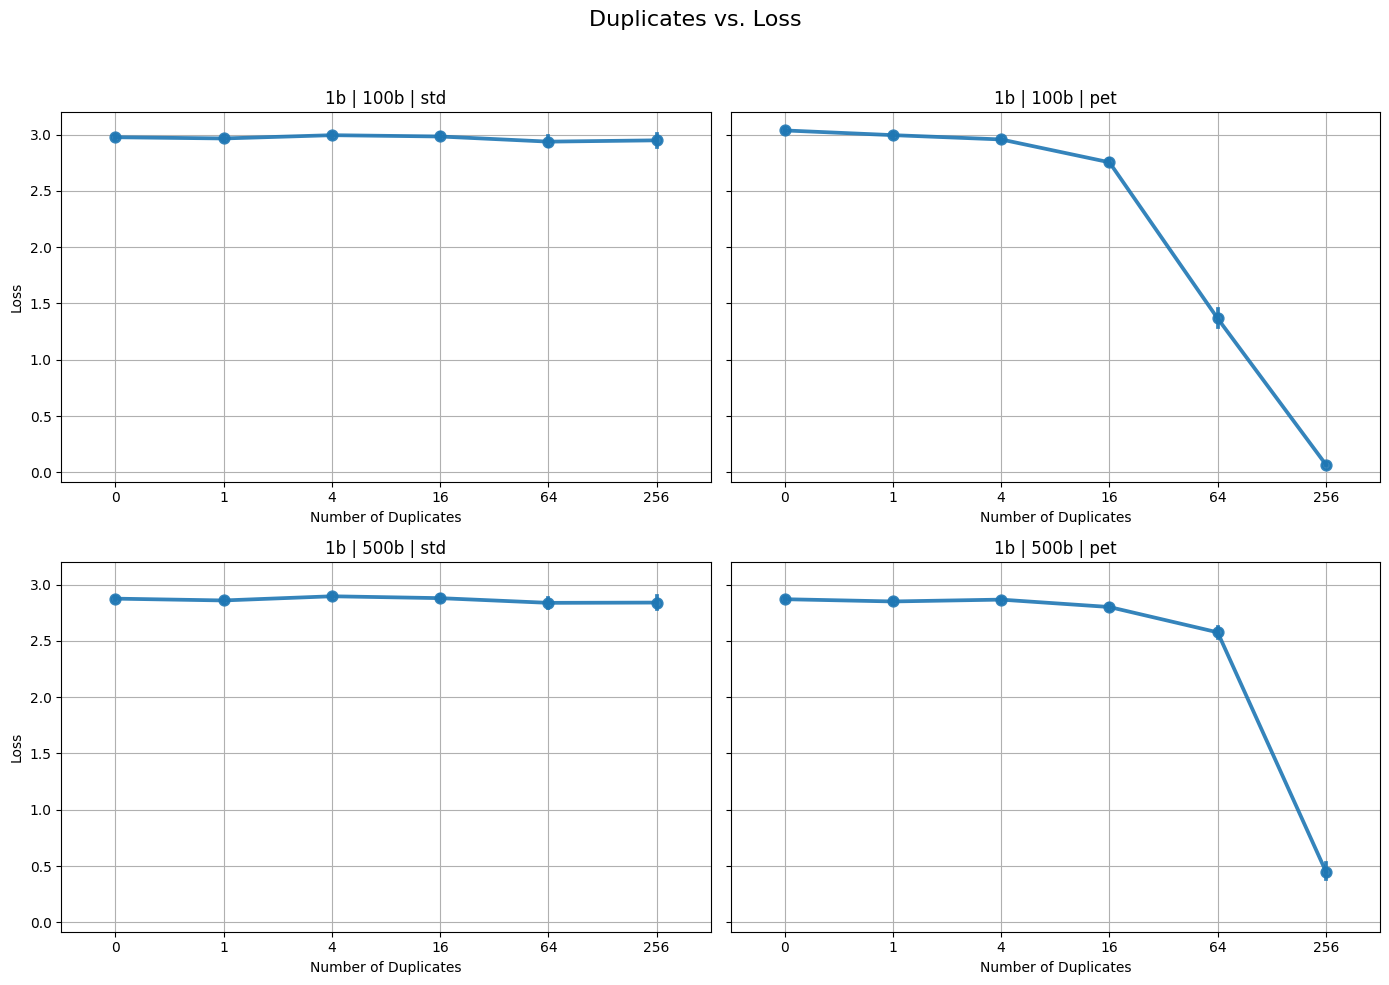

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs/model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[i],
        alpha=0.9,
    )

    # sns.stripplot(
    #     data=df,
    #     x="dup_bin",
    #     y="loss",
    #     ax=axs[i],
    #     jitter=0.3,
    #     alpha=0.1,
    #     size=2.5,
    #     color="steelblue"
    # )
    
    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b", "8b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    
    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

In [ ]:
!pip3 install pandas seaborn

usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_std.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_std.csv
usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet.csv
usc_nlp_research/model_outputs/model_outputs_1b_500b_toks_std.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_500b_toks_std.csv
usc_nlp_research/model_outputs/model_outputs_1b_500b_toks_pet.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_500b_toks_pet.csv
usc_nlp_research/model_outputs/model_outputs_8b_100b_toks_std.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_8b_100b_toks_std.csv
usc_nlp_research/model_outputs/model_outputs_8b_100b_toks_pet.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_8b_100b_toks_pet.csv
usc_nlp_research/model_outputs/model_outputs_8

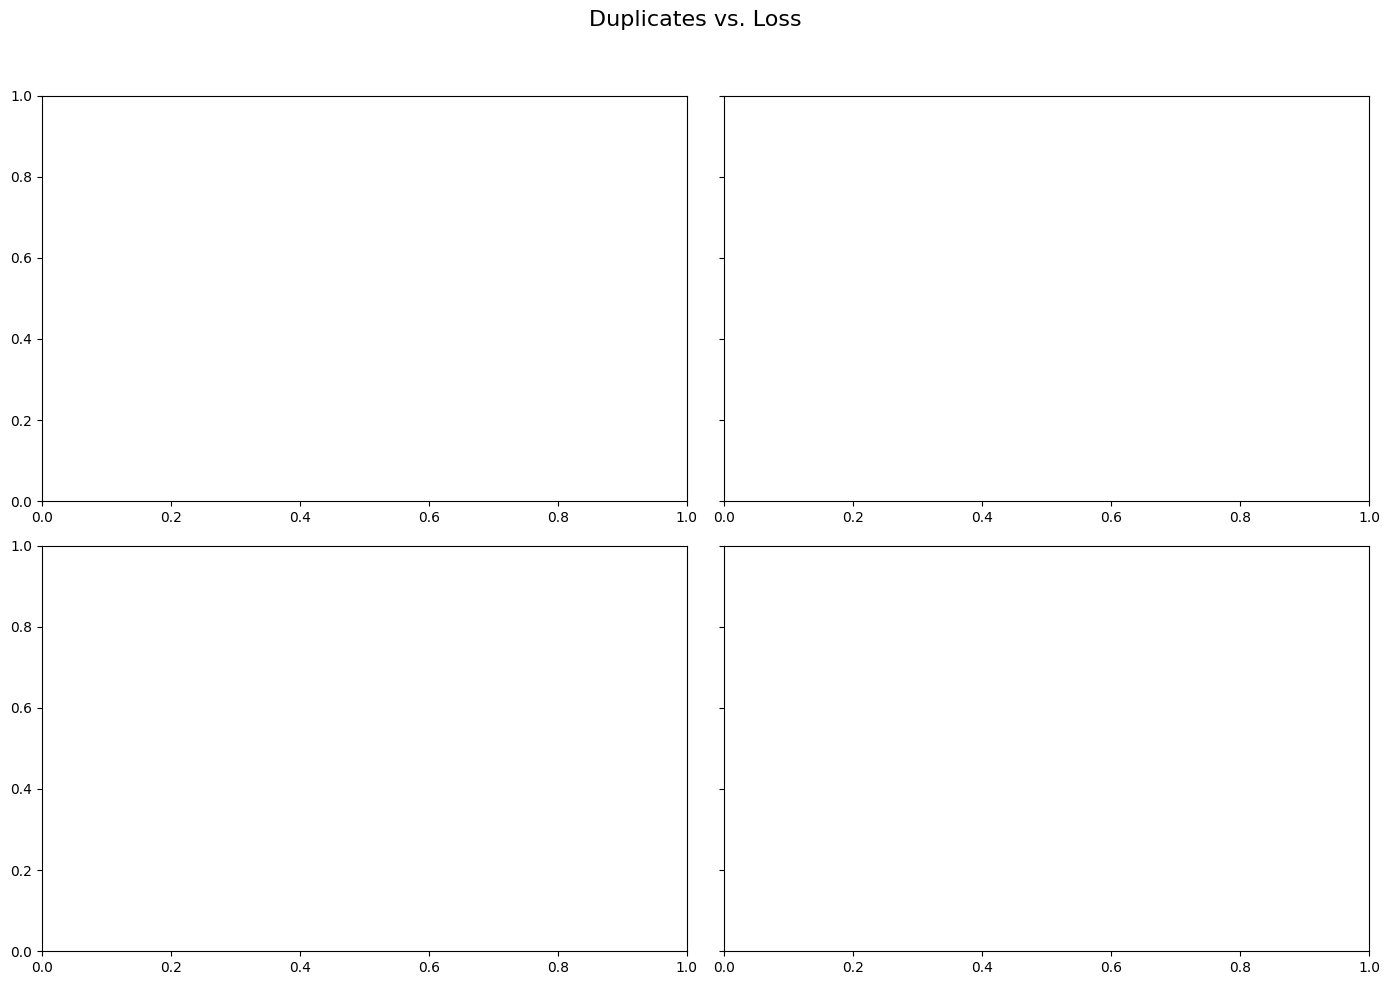

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b", "8b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filepath = f"usc_nlp_research/model_outputs/model_outputs_{m}_{t}_toks_{c}.csv"
    print(filepath)
    
    if not os.path.exists(filepath):
        print(f"Skipping invalid filepath: {filepath}")
        continue

    df = pd.read_csv(filepath)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    
    # axs[i].set_title(f"{m} | {t} | {c}")
    # axs[i].set_xlabel("Number of Duplicates")
    # if i % 2 == 0:
    #     axs[i].set_ylabel("Loss")
    # else:
    #     axs[i].set_ylabel("")

    # axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step0.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step16000.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step24000.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step32000.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step40000.csv
Skipping invalid filepath: usc_nlp_research/model_outputs/model_outputs_1b_100b_toks_pet_step48000.csv


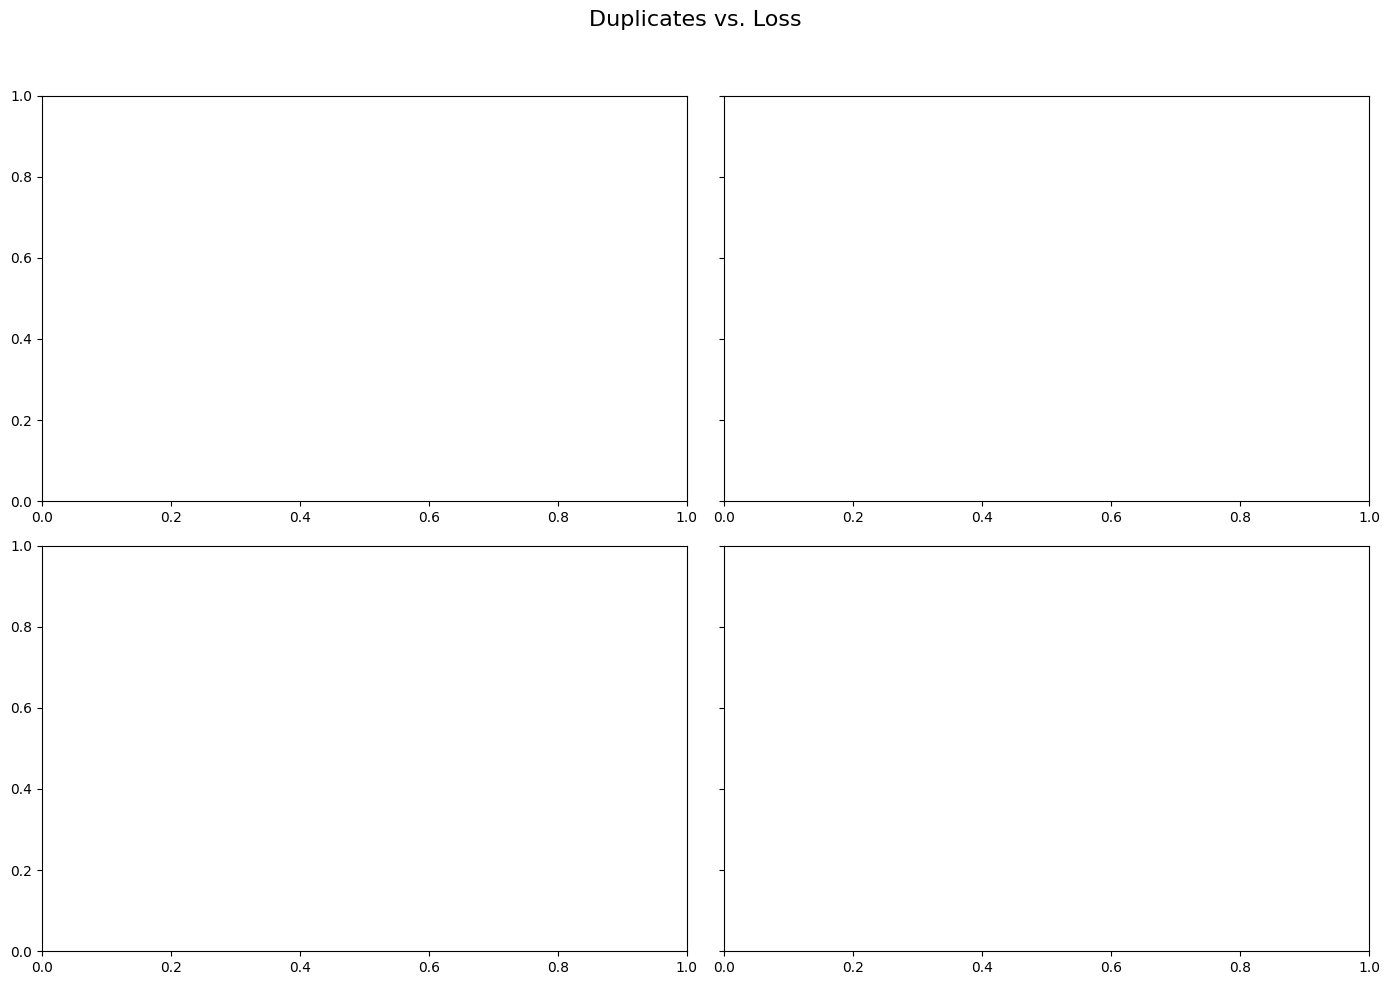

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] 
tokens = ["100b"]
conditions = ["pet"]
revisions = ["step0", "step16000", "step24000", "step32000", "step40000", "step48000"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c, r) in enumerate([(m, t, c, r) for m in models for t in tokens for c in conditions for r in revisions]):
    filepath = f"usc_nlp_research/model_outputs/model_outputs_{m}_{t}_toks_{c}_{r}.csv"
    
    if not os.path.exists(filepath):
        print(f"Skipping invalid filepath: {filepath}")
        continue

    df = pd.read_csv(filepath)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()
